# Day_014

### 練習時間
#### 請根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline # 內嵌繪圖，並且可以省略掉 plt.show()
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')

In [3]:
# 設定 data_path
dir_data = 'D:/Coding Project/GitHub/ML100-Days/data/'
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)

Path of read in data: D:/Coding Project/GitHub/ML100-Days/data/application_train.csv


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train.groupby('HOUSETYPE_MODE').size()

HOUSETYPE_MODE
block of flats      150503
specific housing      1499
terraced house        1212
dtype: int64

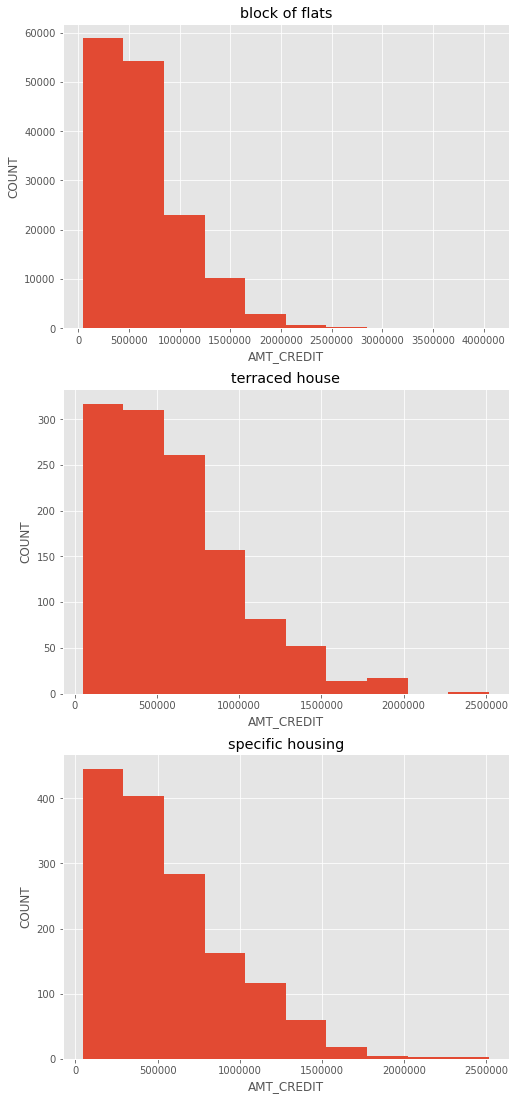

In [6]:
unique_house_type = app_train[~app_train['HOUSETYPE_MODE'].isnull()]['HOUSETYPE_MODE'].unique()

nrows = len(unique_house_type)
ncols = nrows // 2 # 整數除法(去除小數點)

plt.figure(figsize=(8,5))
for i in range(len(unique_house_type)):
    plt.subplots_adjust(top = 3)  # 調整子圖之間的間距
    plt.subplot(nrows, ncols, i+1)      
    app_train.loc[app_train['HOUSETYPE_MODE'] == unique_house_type[i], 'AMT_CREDIT'].hist()    
    plt.title(str(unique_house_type[i]))
    plt.xlabel('AMT_CREDIT')
    plt.ylabel('COUNT')
plt.show()    